In [161]:
%matplotlib inline 
   
import ipywidgets as widgets    
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from IPython.display import clear_output


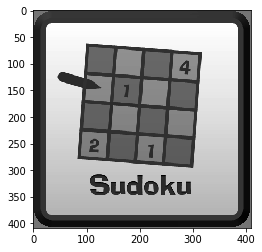

In [163]:
image = cv2.imread('Sudoku.png') # Sudoku
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap = 'gray') # Source Image (RGB)
plt.show()

Canny Thresholds:


A Jupyter Widget

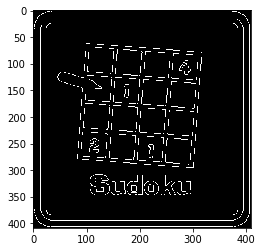

In [164]:
print('Canny Thresholds:')
cannyParams = widgets.IntRangeSlider(
    value=[50, 150],
    min=0,
    max=255,
    step=1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(cannyParams)

def cannyParamChanged(change):
    clear_output()
    print('Canny Thresholds:')
    display(cannyParams)
    lower = cannyParams.value[0]
    upper = cannyParams.value[1]
    canny = cv2.Canny(gray, lower, upper, apertureSize = 3) # apertureSize from 3 to 7
    plt.imshow(canny, cmap = 'gray')
    plt.show()
    
cannyParams.observe(cannyParamChanged, names='value')


HoughLines Threshold:


A Jupyter Widget

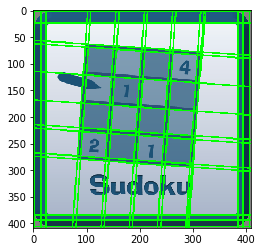

In [165]:
print('HoughLines Threshold:')
houghThreshold = widgets.IntSlider(
     value=100,
    min=0,
    max=255,
    step=5,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(houghThreshold)
imageWithLines = image.copy()

def thresholdChanged(change):
    clear_output()
    print('HoughLines Threshold:')
    display(houghThreshold)
    threshold = houghThreshold.value  
    try:
        lines = cv2.HoughLines(canny,1,np.pi/180,threshold)
        for i in range(lines.shape[0]):            
            for rho, theta in lines[i]:
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a*rho
                y0 = b*rho
                x1 = int(x0 + 1000*(-b))
                y1 = int(y0 + 1000*(a))
                x2 = int(x0 - 1000*(-b))
                y2 = int(y0 - 1000*(a))
                cv2.line(imageWithLines,(x1,y1),(x2,y2),(0,255,0),2)
        plt.imsave('linesHoughAlg.png',imageWithLines)
        plt.imshow(imageWithLines)
        plt.show()
    except:
        clear_output()
        print('Invalid Threshold or lines are not found')
        print('HoughLines Threshold:')
        display(houghThreshold)
    
houghThreshold.observe(thresholdChanged, names='value')

minLineLength:


A Jupyter Widget

maxLineGap:


A Jupyter Widget

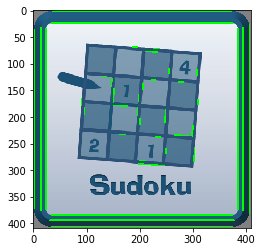

In [170]:
print('minLineLength:')
minLineLength_p = widgets.IntSlider(
    value=180,
    min=0,
    max=255,
    step=5,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(minLineLength_p)

print('maxLineGap:')
maxLineGap_p = widgets.IntSlider(
    value=9,
    min=1,
    max=30,
    step=1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(maxLineGap_p)

imageProb = image.copy()

def thresholdChanged_p(change):
    clear_output()

    print('minLineLength:')
    display(minLineLength_p)  
    print('maxLineGap:')  
    display(maxLineGap_p)

    minLineLength = minLineLength_p.value #100
    maxLineGap = maxLineGap_p.value #10
    minLineLength =  100
    maxLineGap = 10
    
    try:
        lines = cv2.HoughLinesP(canny,1,np.pi/180,100,minLineLength,maxLineGap)
        for i in range(lines.shape[0]):
            for x1,y1,x2,y2 in lines[i]:
                cv2.line(imageProb,(x1,y1),(x2,y2),(0,255,0),2)
        
        plt.imsave('linesHough_Probable.png',imageWithLines)
        plt.imshow(imageProb)
        plt.show()    
    except:
        clear_output()
        print('Invalid Param Values or lines are not found')
        print('minLineLength:')
        display(minLineLength_p)  
        print('maxLineGap:')  
        display(maxLineGap_p)

minLineLength_p.observe(thresholdChanged_p, names='value')
maxLineGap_p.observe(thresholdChanged_p, names='value')